In [1]:
import os
import hopsworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()
    
project = hopsworks.login()
fs = project.get_feature_store()

2025-01-07 16:26:14,332 INFO: Initializing external client
2025-01-07 16:26:14,334 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-07 16:26:16,508 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1159324


In [3]:
grailed_items_fg = fs.get_feature_group(
    name='draft_grailed_items',
    version=4,
)

In [4]:
grailed_items_fg.features

[Feature('id', 'bigint', None, True, False, None, None, 1394604),
 Feature('sold_at', 'timestamp', None, False, False, None, None, 1394604),
 Feature('designer_names', 'array<float>', None, False, False, None, None, 1394604),
 Feature('description', 'array<float>', None, False, False, None, None, 1394604),
 Feature('title', 'array<float>', None, False, False, None, None, 1394604),
 Feature('hashtags', 'array<float>', None, False, False, None, None, 1394604),
 Feature('category_path', 'bigint', None, False, False, None, None, 1394604),
 Feature('condition', 'bigint', None, False, False, None, None, 1394604),
 Feature('size', 'array<float>', None, False, False, None, None, 1394604),
 Feature('color', 'bigint', None, False, False, None, None, 1394604),
 Feature('followerno', 'bigint', None, False, False, None, None, 1394604),
 Feature('sold_price', 'bigint', None, False, False, None, None, 1394604)]

In [5]:
# Set seed
np.random.seed(42)

## Create feature view

In [6]:
# Features inspired by https://github.com/kirill-rubashevskiy/graildient-descent/blob/main/notebooks/retrain_best_ml_model.ipynb
features = ['designer_names', 'category_path', 'color', 'condition', 'followerno', 'hashtags', 'description', 'title'] # , 'size']
labels = ['sold_price']

In [7]:
selected_features = grailed_items_fg.select(features + labels)
selected_features.show(10)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (7.08s) 


,designer_names,category_path,color,condition,followerno,hashtags,description,title,sold_price
0,"[0.008455929, 0.0028697923, 0.06372963, -0.034...",2411092262,3896101161,1,1,"[-0.03810654, -0.006580899, 0.01852548, 0.0113...","[-0.03614048, 0.015635908, 0.036675498, -0.022...","[-0.033801984, -0.0314781, 0.024480032, -0.012...",55
1,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,2,8,"[0.048452068, -0.001368538, 0.016888341, -0.04...","[-0.033516455, 0.04683744, 0.007957818, 0.0407...","[-0.022699146, 0.008013024, 0.041338712, 0.035...",569
2,"[-0.04072198, -0.0048362296, 0.048269928, 0.00...",309901687,2807742906,2,9,"[-0.08957221, 0.0024209158, -0.0056982324, 0.0...","[-0.03905363, 0.008795027, -0.016913513, 0.014...","[-0.020307204, 0.027977625, 0.010602047, -0.01...",278
3,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,3,73,"[-0.052392323, -0.034530703, -0.029495526, -0....","[-0.08783149, 0.023678502, 0.022103464, -0.009...","[-0.030230703, -0.031346425, 0.010791936, 0.01...",800
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012...",180
5,"[-0.023065727, 0.00799096, 0.047225375, 0.0027...",109869071,3892230005,2,7,"[-0.07543781, -0.017064571, 0.007872403, 0.036...","[-0.06583838, 0.037773512, 0.04039962, -0.0096...","[-0.05441786, -0.013890245, 0.031741533, 0.016...",36
6,"[-0.017075147, 0.007701589, 0.085046604, -0.01...",1698257419,271855843,3,65,"[0.018743245, -0.024017261, -0.006219109, -0.0...","[-0.04980058, 0.027313415, 0.07170434, -0.0307...","[-0.09509616, 0.006928549, 0.010449396, -0.028...",72
7,"[-0.021199932, -0.02255822, 0.06599677, -0.003...",991000826,2973695580,1,2,"[-0.045984022, 0.04901945, 0.04931234, 0.02790...","[-0.051647905, -0.0071153087, 0.010234532, -0....","[-0.0287803, -0.0032674577, 0.0071817385, -0.0...",35
8,"[-0.038397297, 0.02080292, 0.04160584, -0.0728...",109869071,2807742906,2,17,"[-0.04747075, 0.042539764, 0.067541204, -0.058...","[-0.02839256, 0.039140027, 0.05657124, -0.0132...","[-0.04790936, 0.04338459, 0.028106825, -0.0019...",39
9,"[-0.017563483, 0.020716926, 0.11166117, 0.0184...",1797518063,1875972108,2,22,"[-0.021639548, 0.0579892, 0.10188011, 0.004635...","[-0.060781166, 0.001159273, 0.04119494, 0.0105...","[-0.08946444, 0.030398728, 0.08259076, -0.0032...",54


In [8]:
feature_view = fs.get_or_create_feature_view(
    name='grailed_items_fv',
    version=15,
    labels=['sold_price'],
    query=selected_features,
)

In [9]:
X_train, X_test, y_train, y_test = feature_view.train_test_split(test_size=0.2)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (7.61s) 


In [10]:
X_train

,designer_names,category_path,color,condition,followerno,hashtags,description,title
0,"[0.008455929, 0.0028697923, 0.06372963, -0.034...",2411092262,3896101161,1,1,"[-0.03810654, -0.006580899, 0.01852548, 0.0113...","[-0.03614048, 0.015635908, 0.036675498, -0.022...","[-0.033801984, -0.0314781, 0.024480032, -0.012..."
3,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,3,73,"[-0.052392323, -0.034530703, -0.029495526, -0....","[-0.08783149, 0.023678502, 0.022103464, -0.009...","[-0.030230703, -0.031346425, 0.010791936, 0.01..."
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012..."
6,"[-0.017075147, 0.007701589, 0.085046604, -0.01...",1698257419,271855843,3,65,"[0.018743245, -0.024017261, -0.006219109, -0.0...","[-0.04980058, 0.027313415, 0.07170434, -0.0307...","[-0.09509616, 0.006928549, 0.010449396, -0.028..."
7,"[-0.021199932, -0.02255822, 0.06599677, -0.003...",991000826,2973695580,1,2,"[-0.045984022, 0.04901945, 0.04931234, 0.02790...","[-0.051647905, -0.0071153087, 0.010234532, -0....","[-0.0287803, -0.0032674577, 0.0071817385, -0.0..."
...,...,...,...,...,...,...,...,...
4879,"[0.015425474, 0.039175384, 0.015797812, -0.013...",2293673942,848381206,3,7,"[0.043237276, 0.012485029, 0.023698373, -0.037...","[-0.0058725853, 0.06217317, 0.00075473345, -0....","[-0.038198672, 0.03346352, 0.07629153, -0.1127..."
4880,"[-0.03686816, -0.03222629, -0.020995108, -0.00...",3210354350,985068137,3,23,"[-0.08246534, 0.004458034, 0.055737026, -0.072...","[-0.06587334, -0.044411045, 0.06696862, -0.006...","[-0.06685267, 0.0020543542, 0.06075587, -0.021..."
4881,"[0.0014109132, -0.02922986, 0.07501799, -0.080...",2782766459,2102778594,2,12,"[-0.06781121, -0.031531412, 0.047270443, -0.04...","[-0.036403824, 0.024345394, 0.046297923, -0.01...","[-0.08032765, 0.030658389, 0.060620602, -0.032..."
4882,"[-0.03592609, 0.056066874, 0.043369997, -0.025...",3713029988,192829683,2,7,"[-0.031281125, 0.05565223, -0.011786899, -0.01...","[-0.024685418, -0.022813914, 0.052955694, 0.00...","[-0.006481837, 0.01953503, 0.054427538, 0.0260..."


## Create a predictive model

Candidates include: XGBoost, CatBoost (handles categorical features natively), KNN or a neural net.

In [11]:
from catboost import CatBoostRegressor, Pool

embedding_features= ['designer_names', 'description', 'title', 'hashtags'] #, 'size']

# Initialize the model
model = CatBoostRegressor(
    embedding_features=embedding_features,
    iterations=1000, # Number of trees
    # learning_rate=0.05,
    # depth=6, 
    loss_function='LogCosh', # LogCosh or RMSE
    verbose=100  # Print training progress every 100 iterations
)

# Create CatBoost Pool objects
train_pool = Pool(
    data=X_train,
    label=y_train,
    embedding_features=embedding_features,
)

test_pool = Pool(
    data=X_test,
    label=y_test,
    embedding_features=embedding_features,
)

# Train the model
model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50
)

0:	learn: 148.7260425	test: 160.1102285	best: 160.1102285 (0)	total: 50.3ms	remaining: 50.2s
100:	learn: 84.1968006	test: 95.3279393	best: 95.3279393 (100)	total: 457ms	remaining: 4.07s
200:	learn: 79.5859541	test: 93.4061430	best: 93.4061430 (200)	total: 948ms	remaining: 3.77s
300:	learn: 76.3709957	test: 93.0285022	best: 93.0094554 (297)	total: 1.34s	remaining: 3.12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 93.00651914
bestIteration = 301

Shrink model to first 302 iterations.


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting target values on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE) using sklearn
mse = mean_squared_error(y_test.iloc[:,0], y_pred)
print("MSE:", mse)

# RMSLE
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test.iloc[:,0], y_pred))
print("RMSLE:", rmsle)

# Calculating R squared using sklearn
r2 = r2_score(y_test.iloc[:,0], y_pred)
print("R squared:", r2)

MSE: 117207.36644691402
RMSLE: 0.769731617085105
R squared: 0.1562048356920377


Best RMSLE on this problem: 0.64 (https://github.com/kirill-rubashevskiy/graildient-descent/blob/main/README.md)

Depth 6:
MSE: 29579.55058842608
RMSLE: 0.830304560803696
R squared: 0.3927258203735853

In [13]:
# TODO: Is the order correct?
predicted_df = y_test
predicted_df['predicted_price'] = y_pred

In [14]:
predicted_df

,sold_price,predicted_price
1,569,268.464620
2,278,162.674856
5,36,43.219697
9,54,215.413096
10,360,173.898739
...,...,...
4864,85,39.544614
4866,150,158.194878
4868,95,204.204564
4875,120,62.039762


### "Outdated" models

In [15]:
# import numpy as np
# from xgboost import XGBRegressor

# # Convert the embeddings column into a numpy array of separate columns
# X_train_array = np.vstack(X_train['designers_title_embedding'].to_numpy())
# X_test_array = np.vstack(X_test['designers_title_embedding'].to_numpy())

# # Now train the model with the reshaped data
# xgb_regressor = XGBRegressor()
# xgb_regressor.fit(X_train_array, y_train)

In [16]:
# from sklearn.neighbors import KNeighborsRegressor
# knn_reg = KNeighborsRegressor(n_neighbors=5)
# knn_reg.fit(X_train_array, y_train)

## Evaluate model

In [17]:
# TODO: Plot performance, consider saving the plots as images

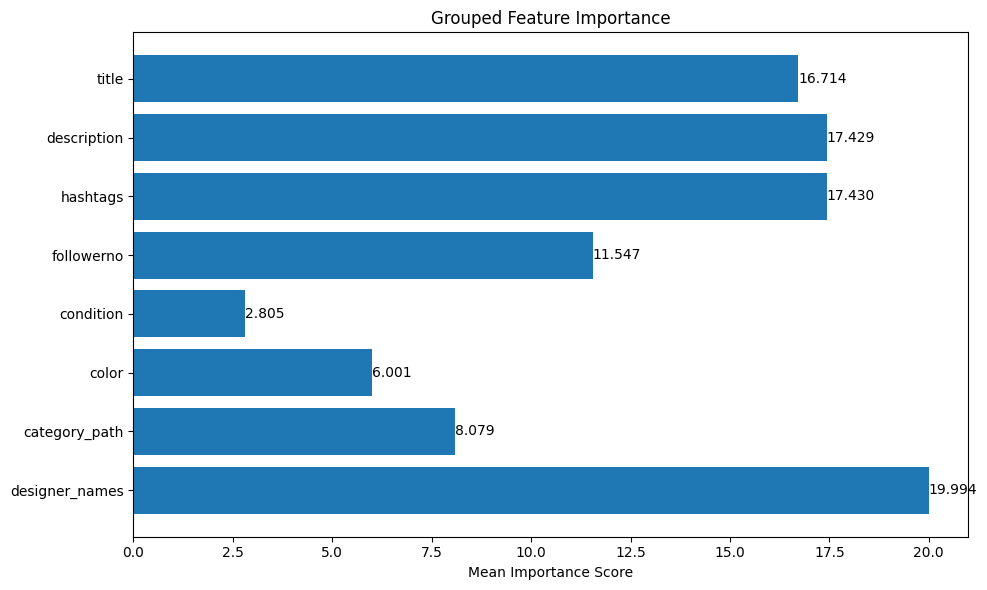

In [18]:
def plot_grouped_feature_importance(model, X_test, original_feature_names=features, embedding_prefix='embedding_'):
    # Get feature importance scores
    feature_importance = model.get_feature_importance()

    # Create the plot
    fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(feature_importance))
    ax.barh(y_pos, list(feature_importance))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    
    plt.title('Grouped Feature Importance')
    plt.xlabel('Mean Importance Score')
    
    # Add value labels on the bars
    for i, v in enumerate(feature_importance):
        ax.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    return plt

# Usage:
plot_grouped_feature_importance(model, X_test)
plt.show()

## Model registry

### Save locally

In [19]:
# Creating a directory for the model artifacts if it doesn't exist
model_dir = "price_predictor_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [20]:
# Save the model locally
model.save_model(model_dir + "/model.json")

### Save to modal registry

In [21]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_example = {}
for col in X_test.columns:
    sample_value = X_test[col].iloc[0]
    if isinstance(sample_value, (list, np.ndarray)):
        # Convert embedding to a simple list of floats
        input_example[col] = [float(x) for x in sample_value]
    else:
        # For regular columns, convert to basic Python types
        value = sample_value
        if isinstance(value, (np.int64, np.int32)):
            value = int(value)
        elif isinstance(value, (np.float64, np.float32)):
            value = float(value)
        input_example[col] = value

# Creating input and output schemas
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

In [22]:
model_schema

ModelSchema(input: 'columnar', output: 'columnar')

In [23]:
res_dict = { 
    "MSE": str(mse),
    "RMSLE": str(rmsle),
    "R squared": str(r2),
}

In [24]:
mr = project.get_model_registry()

In [31]:
grailed_model = mr.python.create_model(
    name="grailed_prediction_catboost_model", 
    metrics=res_dict,
    model_schema=model_schema,
    # input_example=X_test.sample().values, # Bugged
    description="Grailed (fashion) price predictor",
)

In [32]:
grailed_model.save(model_dir)

  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/23075984 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/751 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1159324/models/grailed_prediction_catboost_model/2


Model(name: 'grailed_prediction_catboost_model', version: 2)